# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

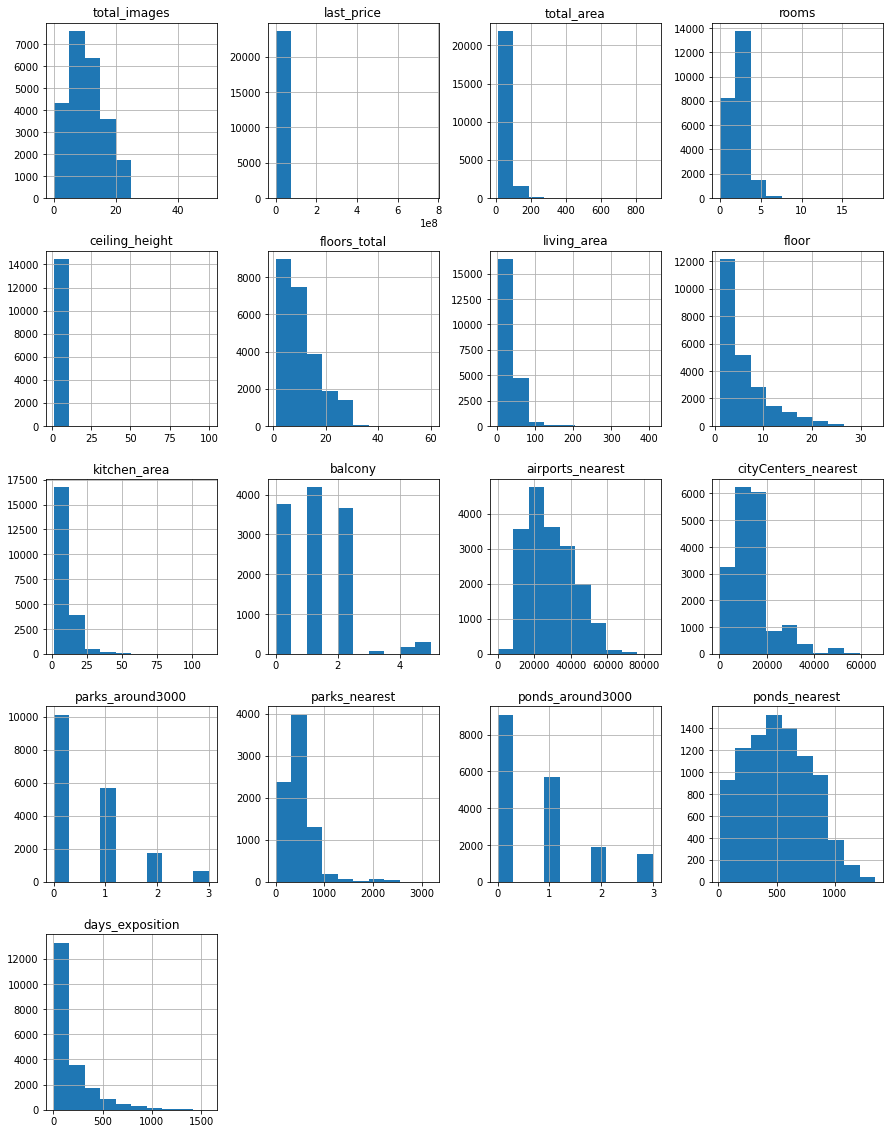

In [1]:
import pandas as pd # импортируем библиотеки pandas и matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv')
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #разделитьель указан буквой t - укаазываю его в коде
display(df)
df.info()
df.hist(figsize=(15, 20))

#### Выводы 
В общей информации о датасете видим проблемы в данных, такие как: пропуски; плохие по стилю названия столбцов. 

### Предобработка данных

In [2]:
df.duplicated().sum() # дупликатов нет

0

In [3]:
df.isna().sum() # пропуски есть

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# некоторые названия выбиваются: cityCenters_nearest, parks_around3000, ponds_around3000. Нужэно их заменить.
df = df.rename(
    columns={
        'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around', 'ponds_around3000':'ponds_around'
    }
)
df.info # проверить, что все переименовалось

<bound method DataFrame.info of        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartmen

In [5]:
# первый столбец с пропусками ceiling_height. Считаем медиану с адекватными значениями потолков от 2 до 10 метров.
df['ceiling_height'].max() #100 метров, скорее всего имелось ввиду 10 метров, это же и с остальными потолками больше 20 метров
df['ceiling_height'].min() #1 метр,определенна ошибка
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] / 10 # все потолки которые больше 20 метров будем делить на 10, т.к. скорее всего имелось ввиду вещественное значение
print (df['ceiling_height'].mean()) # считаем среднюю
df['ceiling_height'] = df['ceiling_height'].fillna(2.72) # заполняем пропуски средним значением
df['ceiling_height'].isna().sum()

2.7296076944291228


0

In [6]:
# Далее идет floors_total
df['floors_total'].max() # максимум этажей в датасете - 60 
df['floors_total'].min() # min в датасете  этажей - 1 
df.loc[df['floors_total'].isnull()]['floor'].max() # максимум этажей в пропусках - 24 
df['floors_total'] = df['floors_total'].fillna(24) # заполняем максимальным значение floor в пропусках, чтобы этажей не оказалось меньше чем самих floor в строках с пропусками.
df['floors_total'].isna().sum() # пропусков нет

0

In [7]:
# Далее - living_area 
# можно получить соотношение среднего living area к среднему total area и использовать его для получение средних значений
living_ratio = df['living_area'].mean() / df['total_area'].mean() # получаем соотношение
df['living_area'] = df['living_area'].fillna(living_ratio * df['total_area']) # заполняем пропуски средним значением к total area нужной строки
df['living_area'].isna().sum() # пропусков нет

0

In [8]:
# далее - is_apartment
df['is_apartment'].value_counts() # только 50 ответили что у них аппартаменты. Остальным можно проставить false
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['is_apartment'].isna().sum()

0

In [9]:
#тут можно сделать анологично с living area, заполнить средними значениями
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_ratio * df['total_area'])
df['kitchen_area'].isna().sum()

0

In [10]:
# столбец balcony заполняем нулем, так как пробел этого значения является отсутствием балкона
df['balcony'] = df['balcony'].fillna(value=0)
df['balcony'].isna().sum()

0

In [11]:
# locality_name - тут есть пропуски и дубликаты 
df['locality_name'].unique() # смотрим уникальные значения
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок') # меняем названия с ё на е 
df = df.dropna(subset=['locality_name']) # удаляем пропуски, т.к. их невозможно заменить
df['locality_name'].isna().sum()

0

In [12]:
# Смотрим на тип данных которые нужно исправить
df['balcony'] = df['balcony'].astype(int) # переводим в цел числа, т.к. float тут не нужен, балконов не может быть полтора 
df['floors_total'] = df['floors_total'].astype('int') # переводим в цел числа т.к. float тут не нужен, комнат может быть цел число
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # приводим время в порядок
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

/tmp/ipykernel_75/2556243712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].astype(int) # переводим в цел числа, т.к. float тут не нужен, балконов не может быть полтора
/tmp/ipykernel_75/2556243712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floors_total'] = df['floors_total'].astype('int') # переводим в цел числа т.к. float тут не нужен, комнат может быть цел число
/tmp/ipykernel_75/2556243712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [13]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.725732,10.723763,34.582279,5.893277,10.502873,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.250274,6.631077,22.359584,4.883317,6.037438,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.720000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.720000,16.000000,42.100000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [14]:
df.loc[df['rooms']==0]['rooms'].count()

197

In [15]:
df.loc[df['rooms']==0, 'rooms'] = 1
df.loc[df['rooms']==0]['rooms'].count()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0

In [16]:
df = df.query('(ceiling_height > 2.0) and (ceiling_height < 10)')

Убираем обьективные аномалии в высоте потолков. Те которые меньше 2 метров и те которые больше 10 метров(такие потолки в Питере всетаки могут быть из за специфики исторических обьектов недвижиости).

In [17]:
df = df.query('total_area < 200')
df = df.query('kitchen_area < 30')

Убираем аномалии в размере площади и кухни.

In [18]:
df = df.query('rooms <= 7')

Убираем аномалии в количестве комнат в квартирах

In [19]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
count,23077.000000,2.307700e+04,23077.000000,23077.00000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,23077.000000,17579.000000,17599.000000,17600.000000,7722.000000,17600.000000,8731.000000,20042.000000
mean,9.798241,5.793522e+06,57.242437,2.02808,2.717746,10.773844,32.958142,5.898860,9.890941,0.593491,28826.136356,14372.558214,0.598011,492.740352,0.756250,522.069408,178.353807
std,5.648953,5.027203e+06,25.152774,0.97142,0.215610,6.643853,16.850386,4.893846,4.035564,0.956806,12729.846730,8590.739880,0.791056,341.584990,0.928745,277.222981,216.801130
min,0.000000,4.300000e+05,12.000000,1.00000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.00000,2.600000,5.000000,18.900000,2.000000,7.000000,0.000000,18459.000000,9593.000000,0.000000,288.000000,0.000000,303.000000,44.000000
50%,9.000000,4.590000e+06,51.000000,2.00000,2.720000,9.000000,30.000000,4.000000,9.000000,0.000000,26815.000000,13222.000000,0.000000,456.000000,0.000000,506.000000,94.000000
75%,14.000000,6.519750e+06,67.800000,3.00000,2.720000,16.000000,41.700000,8.000000,11.500000,1.000000,37407.000000,16407.000000,1.000000,613.000000,1.000000,733.000000,228.000000
max,50.000000,1.240000e+08,198.900000,7.00000,8.300000,60.000000,164.700000,33.000000,29.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Выводы

Проделана предобработка данных:
- переименованные некоторые стобцы, такие как 'city_centers_nearest', 'parks_nearest', 'ponds_nearest'
- пропуски в столбце 'ceiling_height' заменены на медианные, а также исправлены ошибки нереалистычных потолков
- пропущенные значения 'floors_total' заменили на медианные
- заменены пропуски в столбцах 'living_area' и 'kitchen_area' на средние значения
- проставлены значения false в столбце 'is_apartment' где это необходимо
- заменили пропуски в столбце 'balcony'
- удалены пропуски в столбце 'locality_name', а также заменены названия строк для избежания дубликатов названий
- изменили тип данных в столбцах: 'balcony'; 'floors_total'; 'is_apartment'
- Убрали аномальные значения в столбцах 'total_area', 'kithcen_area', 'ceiling_height', 'rooms'

Пропуски в датасете скорее всего появились вследствие неполной или некорректной информации от пользователя. 

### Посчитайте и добавьте в таблицу новые столбцы

In [20]:
df['one_square_meter'] = df['last_price'] / df['total_area'] # столбец с ценой за 1м
df = df.round(1)
display(df) # окгрулили до одной копейки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,one_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4
1,7,3350000.0,40.4,2018-12-04,1,2.7,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7
3,0,64900000.0,159.0,2015-07-24,3,2.7,14,90.8,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1
5,10,2890000.0,30.4,2018-09-10,1,2.7,12,14.4,5,False,...,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.8,2017-03-21,3,3.7,5,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.8
23695,14,3100000.0,59.0,2018-01-15,3,2.7,5,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.4
23696,18,2500000.0,56.7,2018-02-11,2,2.7,3,29.7,1,False,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.7
23697,13,11475000.0,76.8,2017-03-28,2,3.0,17,43.8,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.4


In [21]:
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,one_square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.7,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.7,14,90.8,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015
5,10,2890000.0,30.4,2018-09-10,1,2.7,12,14.4,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.8,2017-03-21,3,3.7,5,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,72490.8,1,3,2017
23695,14,3100000.0,59.0,2018-01-15,3,2.7,5,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,45.0,52542.4,0,1,2018
23696,18,2500000.0,56.7,2018-02-11,2,2.7,3,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,44091.7,6,2,2018
23697,13,11475000.0,76.8,2017-03-28,2,3.0,17,43.8,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.4,1,3,2017


In [22]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.7,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.7,14,90.8,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой
5,10,2890000.0,30.4,2018-09-10,1,2.7,12,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.8,0,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.8,2017-03-21,3,3.7,5,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой
23695,14,3100000.0,59.0,2018-01-15,3,2.7,5,38.0,4,False,...,NaN,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой
23696,18,2500000.0,56.7,2018-02-11,2,2.7,3,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый
23697,13,11475000.0,76.8,2017-03-28,2,3.0,17,43.8,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой


In [23]:
df['city_centers_nearest'] = round(df['city_centers_nearest'] / 1000)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.7,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.7,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.7,14,90.8,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой
5,10,2890000.0,30.4,2018-09-10,1,2.7,12,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.8,0,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.8,2017-03-21,3,3.7,5,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.8,1,3,2017,другой
23695,14,3100000.0,59.0,2018-01-15,3,2.7,5,38.0,4,False,...,NaN,NaN,NaN,NaN,45.0,52542.4,0,1,2018,другой
23696,18,2500000.0,56.7,2018-02-11,2,2.7,3,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,44091.7,6,2,2018,первый
23697,13,11475000.0,76.8,2017-03-28,2,3.0,17,43.8,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.4,1,3,2017,другой


#### Вывод
Добавлены новые столбцы:
- 'one_square_meter' цена одного квадратного метра
- exposition_weekday - день недели публикации объявления
- exposition_month - месяц публикации объявления;
- exposition_year - год публикации объявления;
- floor_type - тип этажа квартиры 
- city_centers_nearest - расстояние до центра города в километрах 

Следует отметить, что из-за пропусков в исходных данных, в значениях также присутствуют пропуски.


### Проведите исследовательский анализ данных

In [24]:
df['total_area'].describe() # смотрим описательную часть

count    23077.000000
mean        57.242415
std         25.152755
min         12.000000
25%         40.000000
50%         51.000000
75%         67.800000
max        198.900000
Name: total_area, dtype: float64

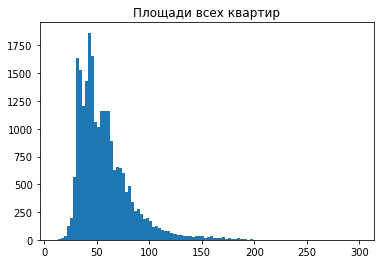

In [25]:
plt.hist(df['total_area'], bins=100, range=(10,300)) # строим гистограмму
plt.title('Площади всех квартир')
plt.show() 

**Площади всех квартир - total_area**
- средняя площадь 57 кв. метров. Большинство объектов распределены от 40 до 110 квадратных метров. 
- Также встречаются от 150 до 200 кв.м., но эти значения минимальны на фоне общего распределения площади квартир

In [26]:
df['living_area'].describe()

count    23077.000000
mean        32.958214
std         16.850384
min          2.000000
25%         18.900000
50%         30.000000
75%         41.700000
max        164.700000
Name: living_area, dtype: float64

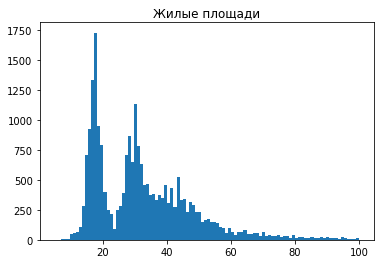

In [27]:
plt.hist(df['living_area'], bins=100, range=(5,100)) # строим гистограмму
plt.title('Жилые площади')
plt.show() 

**Жилые площади - living_area**
- Средняя жилая площадь - 32 м². 
- Большая часть обьектов недвижимости имеют жилую площадь от 15 до 45 м².
- Самый распространенный вариант жилой площади - около 15-18 м². 
- Жилая площадь более 60 м² встречается редко. Также и с площадью меньше 15 м². 
- Квартиры больше 100 м² встречаются довольно редко.

In [28]:
df['kitchen_area'].describe()

count    23077.000000
mean         9.891121
std          4.035346
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         29.900000
Name: kitchen_area, dtype: float64

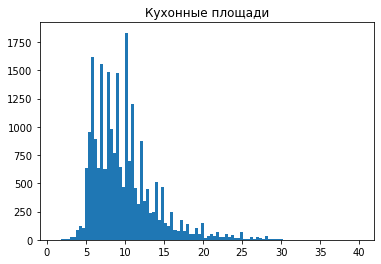

In [29]:
plt.hist(df['kitchen_area'], bins=100, range=(1,40)) # строим гистограмму
plt.title('Кухонные площади')
plt.show() 

**Кухонные площади - kitchen_area**
- Среднее значение площади кухни - 10 м²
- Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 15 м². 
- Самый распространенный вариант площади кухни - около 10-11 м². 
- Площадь кухни менее 5 м² и более 20 м² встречается достаточно редко.
- Площадь кухни менее 5 м² также редкость.

In [30]:
df['last_price'].describe()

count    2.307700e+04
mean     5.793522e+06
std      5.027203e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.590000e+06
75%      6.519750e+06
max      1.240000e+08
Name: last_price, dtype: float64

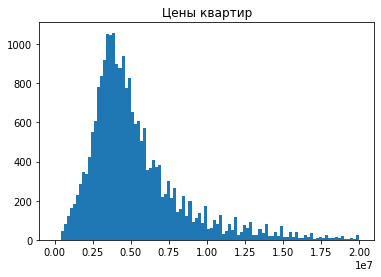

In [31]:
plt.hist(df['last_price'], bins=100, range=(10,20000000)) # строим гистограмму
plt.title('Цены квартир')
plt.show() 

**Цены квартир - last_price**
- Средняя цена квартиры - 6.5 млн.
- Большинство объектов недвижимости имеют цену в пределах от 3 до 6 млн. руб.

In [32]:
df['rooms'].describe()

count    23077.00000
mean         2.02808
std          0.97142
min          1.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          7.00000
Name: rooms, dtype: float64

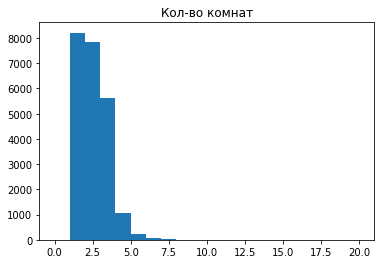

In [33]:
plt.hist(df['rooms'], bins=20, range=(0,20)) # строим гистограмму
plt.title('Кол-во комнат')
plt.show() 

**Кол-во комнат - rooms**
- Средняя кол-во комнат - 2 шт.
- Большинство объектов недвижимости имеет от 1 до 3 комнат 
- 4 и более комнат встречаются довольно редко
- Также присутствуют значение с 0 комнат, скорее всего - это квартиры студии.

In [34]:
df['ceiling_height'].describe() 

count    23077.000000
mean         2.712541
std          0.216030
min          2.200000
25%          2.600000
50%          2.700000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

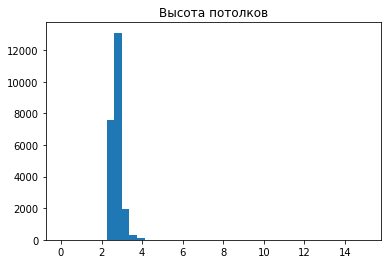

In [35]:
plt.hist(df['ceiling_height'], bins=40, range=(0,15)) # строим гистограмму
plt.title('Высота потолков')
plt.show() 

**Высота потолков - ceiling_height**
- Средняя выоста потолков - 2.7 м
- Большинство объектов недвижимости имеют высоту потолков - до 3 метра.


In [36]:
df['floor'].describe() 

count    23077.000000
mean         5.898860
std          4.893846
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

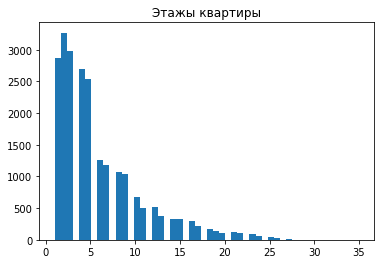

In [37]:
plt.hist(df['floor'], bins=50, range=(1,35)) # строим гистограмму
plt.title('Этажы квартиры')
plt.show() 

**Этажы квартиры - floor**
- Среднее значение расположения этажа квартир на продажу - 6 этаж.
- Большинство объектов недвижимости расположены на 1 - 4 этажах.
- Также в порядке убывания достаточно распространнены квартиры на 5-20 этажах.
- Квартиры начиная с 25 по 30 этажи встречаются крайне редко. 

In [38]:
df['floor_type'].describe() 

count      23077
unique         3
top       другой
freq       16999
Name: floor_type, dtype: object

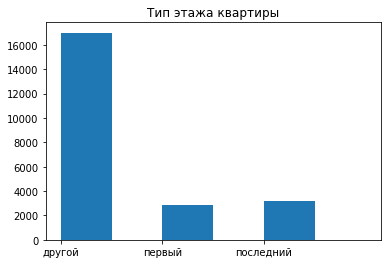

In [39]:
plt.hist(df['floor_type'], bins=6, range=(0,3)) # строим гистограмму
plt.title('Тип этажа квартиры')
plt.show() 

**Тип этажа квартиры - floor_type**
- Больниство обьектовв недвижимости расположоены между перым и последними этажами.
- Обьекты расположенные на первом и последним этажах имеют примерно равные значения.

In [40]:
df['floors_total'].describe() 

count    23077.000000
mean        10.773844
std          6.643853
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

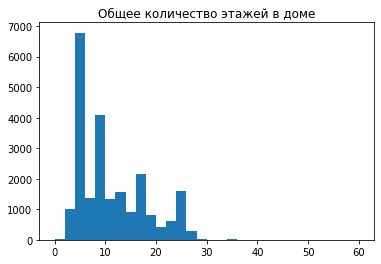

In [41]:
plt.hist(df['floors_total'], bins=30, range=(0,60)) # строим гистограмму
plt.title('Общее количество этажей в доме')
plt.show() 

**Общее количество этажей в доме - floors_total**
- Большинство объектов недвижимости - это 5-ти , 9-ти этажные дома. 
- Среднее значение обьекта недвижимости - 10 этажей.

In [47]:
df['city_centers_nearest'].describe() 

count    17599.000000
mean        14.365930
std          8.598379
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest, dtype: float64

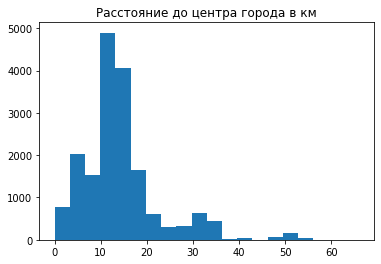

In [52]:
plt.hist(df['city_centers_nearest'], bins=20, range=(0,66)) # строим гистограмму
plt.title('Расстояние до центра города в км')
plt.show() 

**Расстояние до центра города в метрах - city_centers_nearest**
- Среднее расстояние от центра - 14 км.
- Большинство объектов недвижимости расположены в 12-17 км от центра. 
- Также, достаточное кол-во квартир расположены в в пределах менее 10 км от цента.
- Квартиры расположенные больше 20 км от центра встречаются наименее часто.

In [ ]:
df = df.loc[df['airports_nearest'] > 0]
df['airports_nearest'].describe() 

In [ ]:
plt.hist(df['airports_nearest'], bins=100, range=(0,85000)) # строим гистограмму
plt.title('Расстояние до ближайшего аэропорта')
plt.show() 

**Расстояние до ближайшего аэропорта - airports_nearest**
- Большая часть объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км.
- Среднее расстояние до аэропорта - 28,8 км 

In [ ]:
df['parks_nearest'].describe() 

In [ ]:
plt.hist(df['parks_nearest'], bins=100, range=(0,3200)) # строим гистограмму
plt.title('Расстояние до ближайшего парка')
plt.show() 

**Расстояние до ближайшего парка - parks_nearest**
- Большая часть объектов недвижимости расположены в 400-600 м.
- Среднее расстояние до парков - 490 м.

In [ ]:
df['exposition_weekday'].describe()  

In [ ]:
plt.hist(df['exposition_weekday'], bins=20, range=(0,6)) # строим гистограмму
plt.title('День публикации объявления')
plt.show() 

**День публикации объявления - exposition_weekday**
- Больше всего объявления публиковали в будние дни.
- Наиболее редкие обьявления - в выходные.

In [ ]:
df['exposition_month'].describe()  

In [ ]:
plt.hist(df['exposition_month'], bins=30, range=(0,12)) # строим гистограмму
plt.title('Месяц публикации объявления')
plt.show() 

**День публикации объявления - exposition_weekday**
- Больше всего объявления публиковали в феврале и марте.
- Наименьшие показатели в январе и мае. 

In [ ]:
df['days_exposition'].describe() 

In [ ]:
plt.hist(df['days_exposition'], bins=100, range=(0,200)) # строим гистограмму
plt.title('сколько дней было размещено объявление (от публикации до снятия)')
plt.show() 

**сколько дней было размещено объявление (от публикации до снятия - days_exposition**
- Среднее время продажи - 181 д.
- Медианное время продажи - 95 д. 
- В принципе, график проджаж отражает плавность 
- Быстрой продажей квартиры по графику считается - около 45 дней.
- Долгой продажей квартиры по графику считается - больше 230 дней.
- Наиболее частые продажи совершаются на 45-й и 60-й день.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

In [ ]:
df.plot(x='total_area', y='last_price', kind='scatter')

-  Из графика видно, что цена напрямую зависит от общей площади 

In [ ]:
df.plot(x='living_area', y='last_price', kind='scatter')

- Между  жилой площадью и стоимостью мы также видим зависимость этих параметров, с увеличением площади, также увеличивается и цена

In [ ]:
df.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(10, 5))

- Между кол-во комнат и стоимостью мы видим достаточно низкую корреляцию

In [ ]:
df.pivot_table(index='floor_type', values='last_price').plot(grid=True, figsize=(10, 5))

- Между этажем и стоимостью есть зависимость, наименее предпочтительный этаж - первый

In [ ]:
df.plot(x='kitchen_area', y='last_price', kind='scatter')

- Между площадью кухни и ценой мы видим положительную динамику, в целом чем больше плозадь кухни, тем цена стремится вверх

In [ ]:
df.pivot_table(index='exposition_weekday', values='last_price', aggfunc='mean').plot(figsize=(10, 5))
df.pivot_table(index='exposition_month', values='last_price', aggfunc='mean').plot(figsize=(10, 5))
df.pivot_table(index='exposition_year', values='last_price', aggfunc='mean').plot(figsize=(10, 5))

- На конец года приходится повышение цен о продажах. После 2014 года, пошло резкое падение цен на недвижимость.

In [ ]:
df.pivot_table(index='exposition_year', values='last_price')
df.pivot_table(index='exposition_month', values='last_price')
df.pivot_table(index='exposition_weekday', values='last_price')

- Самые дорогие квартиры были на продаже в 2014 году. После 2014 ценовая политика менялась слабо.
- Четкой связи между месяцем выставления на публикацию нет.
- Четкой связи между днем выставления на публикацию нет.

In [ ]:
table = df[['total_area', 'rooms', 'city_centers_nearest', 'floor_type', 'exposition_year', 'exposition_month', 'exposition_weekday', 'last_price']]
pd.plotting.scatter_matrix(table, figsize=(15, 15))

In [ ]:
top_10_locations = df['locality_name'].value_counts().head(10)
display(top_10_locations)

In [ ]:
df.query('locality_name in @top_10_locations.index').pivot_table(index='locality_name', values='one_square_meter')

- Населённые пункты с самой высокой и низкой стоимостью квадратного метра:
    - Санкт-Петербург 
    - Выборг

In [ ]:
 df.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean') 

- Как видно из сводной таблицы - чем ближе к центру, тем дороже обьект недвижимости

### Общий вывод

**По итогу изучения данных можно сделать следующие выводы**:

**Проделана предобработка данных**:
- переименованные некоторые стобцы, такие как 'city_centers_nearest', 'parks_nearest', 'ponds_nearest'
- пропуски в столбце 'ceiling_height' заменены на медианные, а также исправлены ошибки нереалистычных потолков
- пропущенные значения 'floors_total' заменили на медианные
- заменены пропуски в столбцах 'living_area' и 'kitchen_area' на средние значения
- проставлены значения false в столбце 'is_apartment' где это необходимо
- заменили пропуски в столбце 'balcony'
- удалены пропуски в столбце 'locality_name', а также заменены названия строк для избежания дубликатов названий
- изменили тип данных в столбцах: 'balcony'; 'floors_total'; 'is_apartment'
- Пропуски в датасете скорее всего появились вследствие неполной или некорректной информации от пользователя. 

**Добавлена новая информация в датасет**:
- 'one_square_meter' цена одного квадратного метра
- exposition_weekday - день недели публикации объявления
- exposition_month - месяц публикации объявления;
- exposition_year - год публикации объявления;
- floor_type - тип этажа квартиры 
- city_centers_nearest - расстояние до центра города в километрах 

**Проведен исследовательский анализ данных следующих параметров обьектов недвижимости**

*Площади всех квартир*
- средняя площадь 57 кв. метров. Большинство объектов распределены от 40 до 110 квадратных метров. 
- Также встречаются от 150 до 200 кв.м., но эти значения минимальны на фоне общего распределения площади квартир

*Жилые площади**
- Средняя жилая площадь - 32 м². 
- Большая часть обьектов недвижимости имеют жилую площадь от 15 до 45 м².
- Самый распространенный вариант жилой площади - около 15-18 м². 
- Жилая площадь более 60 м² встречается редко. Также и с площадью меньше 15 м². 
- Квартиры больше 100 м² встречаются довольно редко.

*Кухонные площади*
- Среднее значение площади кухни - 10 м²
- Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 15 м². 
- Самый распространенный вариант площади кухни - около 10-11 м². 
- Площадь кухни менее 5 м² и более 20 м² встречается достаточно редко.
- Площадь кухни менее 5 м² также редкость.

*Цены квартир*
- Средняя цена квартиры - 6.5 млн.
- Большинство объектов недвижимости имеют цену в пределах от 3 до 6 млн. руб.

*Кол-во комнат*
- Средняя кол-во комнат - 2 шт.
- Большинство объектов недвижимости имеет от 1 до 3 комнат 
- 4 и более комнат встречаются довольно редко
- Также присутствуют значение с 0 комнат, скорее всего - это квартиры студии.

*Высота потолков*
- Средняя выоста потолков - 2.7 м
- Большинство объектов недвижимости имеют высоту потолков - 3 метра.

*Этажы квартиры *
- Среднее значение расположения этажа квартир на продажу - 6 этаж.
- Большинство объектов недвижимости расположены на 1 - 4 этажах.
- Также в порядке убывания достаточно распространнены квартиры на 5-20 этажах.
- Квартиры начиная с 25 по 30 этажи встречаются крайне редко. 

*Тип этажа квартиры**
- Больниство обьектовв недвижимости расположоены между перым и последними этажами.
- Обьекты расположенные на первом и последним этажах имеют примерно равные значения.

*Общее количество этажей в доме*
- Большинство объектов недвижимости - это 5-ти , 10-ти этажные дома. 
- Среднее значение обьекта недвижимости - 10 этажей.

*Расстояние до центра города в метрах*
- Среднее расстояние от центра - 14 км.
- Большинство объектов недвижимости расположены в 12-17 км от центра. 
- Также, достаточное кол-во квартир расположены в в пределах менее 10 км от цента.
- Квартиры расположенные больше 20 км от центра встречаются наименее часто.

*Расстояние до ближайшего аэропорта**
- Большая часть объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км.
- Среднее расстояние до аэропорта - 28,8 км 

*Расстояние до ближайшего парка*
- Большая часть объектов недвижимости расположены в 400-600 м.
- Среднее расстояние до парков - 490 м.

*День публикации объявления**
- Больше всего объявления публиковали в будние дни.
- Наиболее редкие обьявления - в выходные.

*День публикации объявления**
- Больше всего объявления публиковали в феврале и марте.
- Наименьшие показатели в январе и мае. 

*Кол-во дней размещения объявления*
- Среднее время продажи - 181 д.
- Медианное время продажи - 95 д. 
- В принципе, график проджаж отражает плавность 
- Быстрой продажей квартиры по графику считается - около 45 дней.
- Долгой продажей квартиры по графику считается - больше 230 дней.
- Наиболее частые продажи совершаются на 45-й и 60-й день.
                                          
**Изучены факторы влияния на цену обьекта недвижимости**
- Между площадью и стоимостью обьектов недвижимости мы видим зависимость значений 
- Самые дорогие квартиры были на продаже в 2014 году. После 2014 ценовая политика менялась слабо.
- На конец года приходится повышение цен о продажах.
- Первый этаж цениться ниже чем квартиры на других этажах
- Четкой связи между месяцем выставления на публикацию нет.
- Четкой связи между днем выставления на публикацию нет.
- Чем ближе недвижимость к центру, тем она дороже
- Населённые пункты с самой высокой и низкой стоимостью квадратного метра:
    - Санкт-Петербург (самые дорогие)
    - Выборг(самые дешевые)

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод